# Classification Task dengan Decision Tree
Rangkuman dan pembelajaran dikutip dari sumber: https://www.youtube.com/watch?v=5wwXKtLkyqs

Referensi: https://en.wikipedia.org/wiki/Decision_tree_learning

## Konsep Dasar
### Terminology: root node, internal node, leaf node
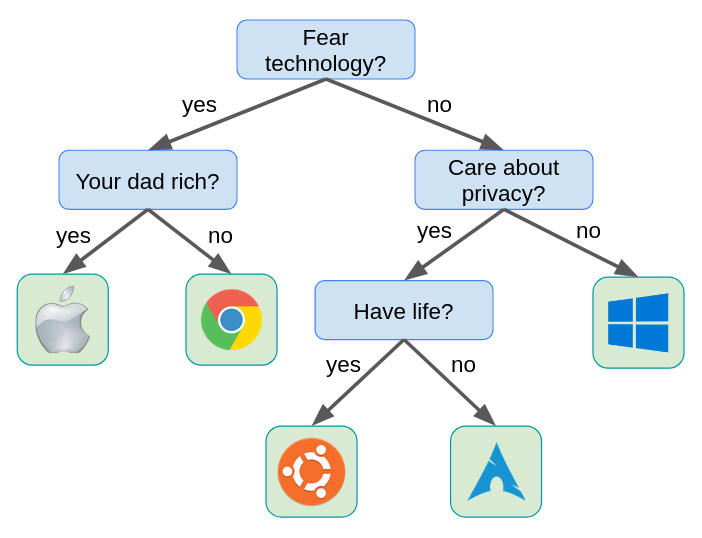
- Struktur ini dikenal sebagai tree atau **binary tree**.
- Root node = akar (posisi paling atas = fear technology).
- Internal node = diantara root dan leaf.
- Leaf node = ujung bawah (merepresentasikan prediksi class yang akan dihasilkan).

### Gini Impurity (Pengukuran Ketidakmurnian)
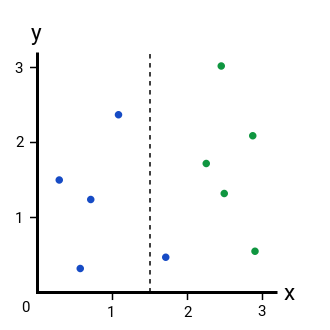
- memiliki jangkauan antara nilai 0 dan 1, 0 adalah nilai murni yang sempurna, 1 adalah nilai yang paling tidak murni.
- terdapat kelas biru dan hijau.
- garis putus-putus sebagai pemisah.

#### Ruas Kiri:

- nilai probability dari kelas biru.

#### Ruas Kanan:

- nilai probability dari kelas hijau.

#### Average Gini Impurity:


### Information Gain
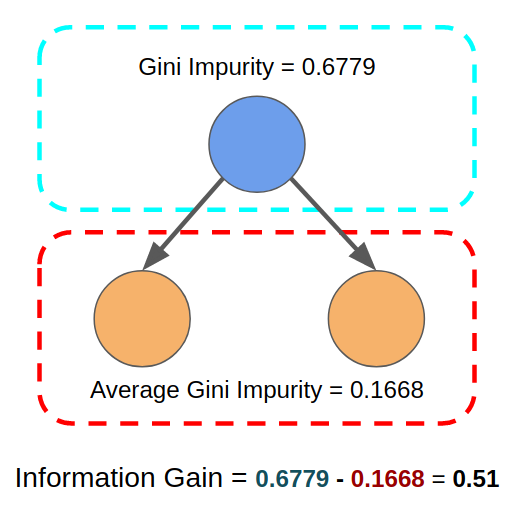
- Information gain didapatkan dari selisih Gini Impurity dengan Average Gini Impurity.

### Membangun Decision Tree
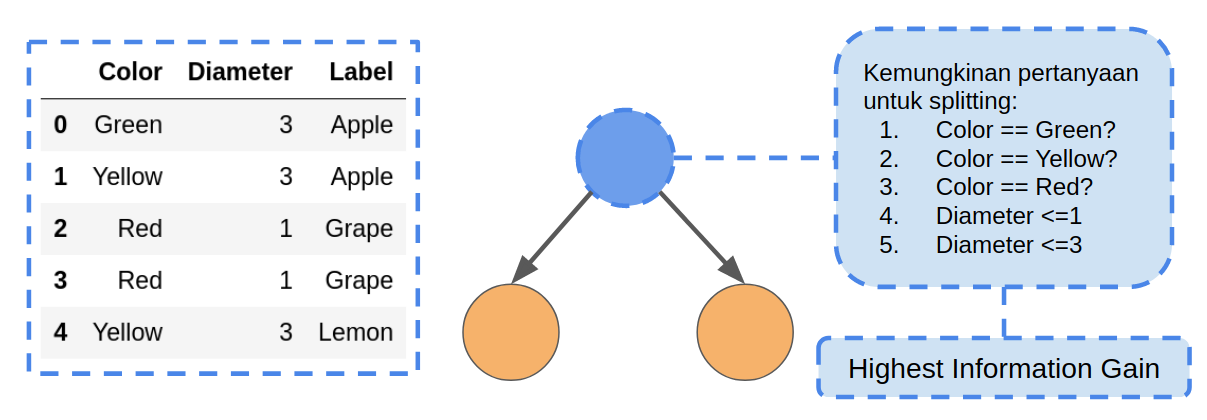
- kolom color dan diameter berperan sebagai features.
- kolom label berperan sebagai target label.


In [1]:
1 - ( (2/5)**2 + (2/5)**2 + (1/5)**2 )

0.6399999999999999

In [2]:
import pandas as pd

training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["Color", "Diameter", "Label"]

pd.DataFrame(training_data, columns=header)

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


# Dataset
Referensi: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


Berikut terdapat 150 baris dan 4 kolom. Lalu terdapat 3 buah class dan dibagi ke training dan testing set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

# Classification dengan DecisionTreeClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

max_depth = memiliki kedalaman maksimum 4 layer.

# Visualisasi Model

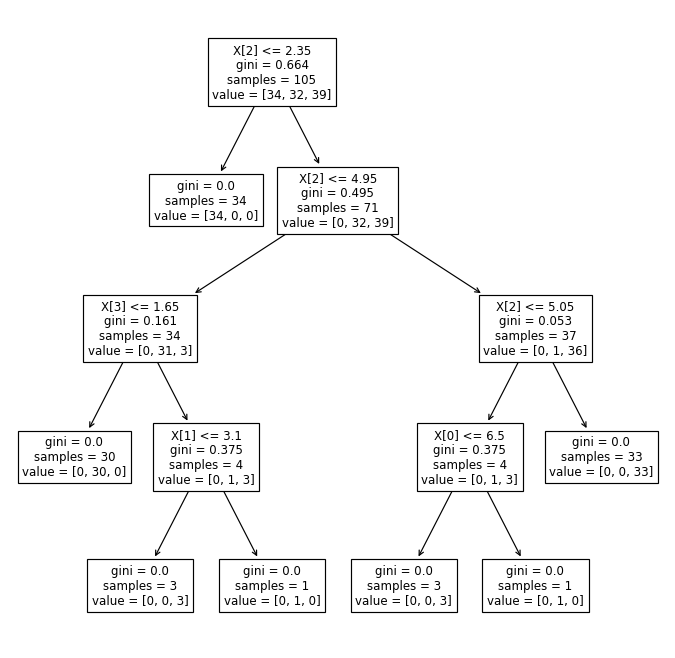

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

Terdapat 7 leaf node, 1 root node dan 5 internal node.

- root note = memanfaatkan features index ke 2 dan syaratnya apakah nilainya <= 2.35, gini merupakan impurity sebelum proses splitting, terdapat samples sebelum splitting yaitu 105, lalu terdapat value ada 3. Artinya kelas ke 0 terdapat 34 data, index ke 1 terdapat 32 data, dan index ke 2 terdapat 39 data.
- Setelah ada proses splitting terdapat 2 buah ruas. Ruas kiri gini = 0.0 yang berarti sudah murni.
- Ruas kanan harus melakukan proses splitting lagi karena gini = 0.495.

# Evaluasi Model

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

